In [20]:
import pandas as pd
import seaborn as sns
data = pd.read_excel('Приложение №1 к кейсу IT (1).xlsm').drop('Номер', axis=1)

%matplotlib inline

In [4]:
data

,Форма,Цвет,Размер,Флуоресценция,Вес,Стоимость
0,Звезда,Cиний,Средний,Светится,427,3
1,Круг,Жёлтый,Большой,Не светится,507,7
2,Круг,Жёлтый,Средний,Светится,339,4
3,Звезда,Зелёный,Большой,Не светится,655,6
4,Звезда,Зелёный,Средний,Не светится,309,4
...,...,...,...,...,...,...
995,Звезда,Жёлтый,Средний,Не светится,365,3
996,Звезда,Жёлтый,Средний,Не светится,364,5
997,Звезда,Жёлтый,Средний,Не светится,252,3
998,Звезда,Жёлтый,Средний,Не светится,458,4


In [8]:
size2num = {
    'Малый': 0,
    'Средний': 1,
    'Большой': 2
}

In [9]:
data['Размер'] = list(map(lambda x: size2num[x], data['Размер']))

In [54]:
data_one_hot = pd.get_dummies(data)

In [55]:
data_one_hot.head()

,Вес,Стоимость,Форма_Звезда,Форма_Квадрат,Форма_Круг,Форма_Треугольник,Цвет_Cиний,Цвет_Жёлтый,Цвет_Зелёный,Цвет_Красный,Размер_Большой,Размер_Малый,Размер_Средний,Флуоресценция_Не светится,Флуоресценция_Светится
0,427,3,1,0,0,0,1,0,0,0,0,0,1,0,1
1,507,7,0,0,1,0,0,1,0,0,1,0,0,1,0
2,339,4,0,0,1,0,0,1,0,0,0,0,1,0,1
3,655,6,1,0,0,0,0,0,1,0,1,0,0,1,0
4,309,4,1,0,0,0,0,0,1,0,0,0,1,1,0


In [56]:
data_one_hot['Вес'] /= 100

In [57]:
data_one_hot.head()

,Вес,Стоимость,Форма_Звезда,Форма_Квадрат,Форма_Круг,Форма_Треугольник,Цвет_Cиний,Цвет_Жёлтый,Цвет_Зелёный,Цвет_Красный,Размер_Большой,Размер_Малый,Размер_Средний,Флуоресценция_Не светится,Флуоресценция_Светится
0,4.27,3,1,0,0,0,1,0,0,0,0,0,1,0,1
1,5.07,7,0,0,1,0,0,1,0,0,1,0,0,1,0
2,3.39,4,0,0,1,0,0,1,0,0,0,0,1,0,1
3,6.55,6,1,0,0,0,0,0,1,0,1,0,0,1,0
4,3.09,4,1,0,0,0,0,0,1,0,0,0,1,1,0


In [58]:
data_one_hot['Стоимость'] *= 2

In [59]:
from sklearn.cluster import k_means

In [60]:
marks = k_means(data_one_hot, 10)[1]

In [61]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=50.0).fit_transform(np.array(data_one_hot))

<AxesSubplot:>

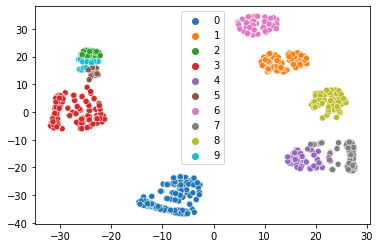

In [62]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=marks, palette=sns.color_palette("tab10")[0:10])

In [63]:
data[marks == 5]['Стоимость'].value_counts(normalize=True)

5    0.695652
6    0.304348
Name: Стоимость, dtype: float64

In [64]:
data[marks == 1]['Стоимость'].value_counts(normalize=True)

2    1.0
Name: Стоимость, dtype: float64

In [65]:
data[marks == 8]['Стоимость'].value_counts(normalize=True)

3    1.0
Name: Стоимость, dtype: float64